In [45]:
#Import Essential Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import sys
sys.path.append('C:\\Users\\Master\\Desktop\\dataTools')
import dataTools as dt

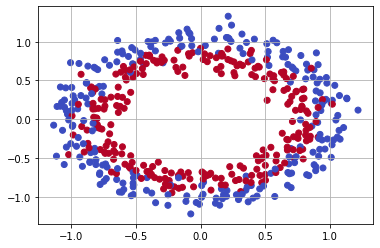

In [46]:
#Sample Generation
x, y = datasets.make_circles(n_samples=500, noise=0.1, random_state=123)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

In [47]:
#Bootstrapping (Manually) - sampling with replacement
subsample = []
for i in range(11):
    index = [x for x in range(x.shape[0])]
    sampling = np.random.choice(index, x.shape[0]//2, replace=True)
    subsample.append(sampling)
subsample


[array([304, 186, 460, 123, 320, 388, 423, 328,  17, 248, 226,  22,  95,
        386,   8, 447, 147,  72, 122, 338, 497, 430, 367,   8, 335, 309,
         91,  71, 396, 159, 452, 127, 300,   3, 276, 161, 318, 189, 182,
        230, 200, 421, 405, 394, 236,  89, 286, 326,   0, 189,  90, 370,
        299, 154, 196,  89, 266, 417, 493, 338, 145,  34, 220,  51, 309,
        390, 284, 114,  72, 352, 322, 192, 479, 283, 180, 181, 302, 405,
        195, 280,  52, 265, 175,  57, 151, 101, 226, 308, 416, 118, 488,
        364, 110, 373, 376, 280, 253, 336, 360, 207,  22, 182, 224, 462,
        182, 267, 431, 252,   0,  83,  57,   4, 116, 131,  43, 494, 369,
        251,  68, 341,  23, 136, 486, 468,  71, 205,   6, 474, 359,  81,
         45, 455, 106, 212, 203, 152, 419, 124,  23, 334, 255,  62, 281,
        221, 399, 490, 432,  93, 491, 428, 309, 157, 112, 346, 143, 302,
         16, 151, 334, 140, 451, 317, 443, 340, 410, 302, 216,  99, 492,
        369,  97,  98, 498, 173, 466, 295, 227, 382

In [48]:
#Bagging (manually)
bagging = []
for index in subsample:
    x_train = x[index]
    y_train = y[index]
    model = DecisionTreeClassifier().fit(x_train, y_train)
    bagging.append(model.predict(x))
display(len(bagging))
display(len(bagging[0]))

11

500

In [49]:
bagging_prediction = []
for i in range(len(bagging[0])):
    total = []
    for j in bagging:
        total.append(j[i])
    cnt = Counter(total)
    bagging_prediction.append(cnt.most_common(1)[0][0])

In [50]:
print(bagging_prediction)

[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 

In [51]:
#Evaluation
yhat = np.array(bagging_prediction)
accuracy_score(y, yhat)

0.934

In [52]:
#Decision Tree + Bagging
base_model = DecisionTreeClassifier()
baggingmodel = BaggingClassifier(
    base_estimator=base_model,
    n_estimators=11
)
baggingmodel.fit(x,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=11)

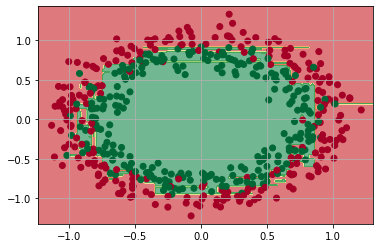

In [53]:
#Result Visualization
dt.dimensionchange(baggingmodel, x[:,0], x[:,1], cmap='RdYlGn', alpha=0.6)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='RdYlGn')
plt.grid()
plt.show()

In [54]:
#Random Forest (Library)
model = RandomForestClassifier(
    n_estimators=1000,
    random_state=12
)
model.fit(x,y)

RandomForestClassifier(n_estimators=1000, random_state=12)

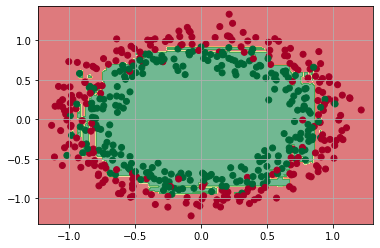

In [55]:
dt.dimensionchange(model, x[:,0],x[:,1],cmap='RdYlGn',alpha=0.6)
plt.scatter(x[:,0],x[:,1],c=y, cmap='RdYlGn')
plt.grid()
plt.show()